In [1]:
import sys
path ="/home/sergio/github/shaolin-master"
sys.path.append(path)

# Introduction to Shaolin

<a id='index'></a>

## Index 

- [1 Introduction](#intro)
- [2 Widget Basics](#widget_basics)
   - [2.1 Structure](#widget_structure)
   - [2.2 Attributes](#widget_attributes)
   - [2.3 Creation](#widget_creation)
       - [2.3.1 Using the Widget class](#widget_creation_class)
       - [2.3.2 Using shaoscript](#widget_creation_shaoscript)
- [3 Shaoscript](#shaoscript)
   - [3.1 widget object](#shaoscript)
   - [3.2 Object notation](#object_notation)
   - [3.3 String notation](#string_notation)
   - [3.4 Parameters](#string_notation_parameters)

- [4 Dashboard Basics](#dashboard_basics)
   - [4.1 Types](#dashboard_types)
   - [4.2 Structure](#dashboard_structure)
   - [4.3 Attributes](#dashboard_attributes)
   - [4.4 Functions](#dashboard_functions)



<a id='introduction'></a>

# 1 Introduction

[Back to top](#index)

**Shaolin** (**S**tructure **H**elper for d**A**shb**O**ards **LIN**king) is a framework that aims to simplify the process of writing  interactive dashboards. Shaolin can be seen as an interface that provides an additional layer of functionality to the ipywidgets library, extending its capabilities and providing en easier way to write complex GUIs composed of multiple widgets and different levels of interactivity.

This framework is build around the concept of Dashboard. A Dashboard could be interpreted as "black box" object that can be completely managed trhough a GUI comprised of widgets that will allow us to interact with its internal code. A dashboard can be used to generate an arbitrary dictionary of parameters or it can also execute an arbitrary piece of code using its GUI to manage the code parameters.


<a id='widget_basics'></a>

# 2 Widgets Basics

[Back to top](#index)

A widget is the most basic component a Dashboard can have. A Shaolin widget is just a wrapper for an ipywidgets widget to decouple the shaolin framework from ipywidgets, improve scalability and making it easier to create a new widged using a minified syntax.

Any widget compatible with the ipywidgets package can be used as a shaolin widget. [Here](http://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html) you can fin a list of available widgets, but shaolin is also compatible with custom widgets.


<a id='widget_structure'></a>

## 2.1 Widget structure

A Shaolin Widget is an object that mimics the ipywidgets interface and adds additional functionality. Its displayed using its widget attribute and internally it has two main elements:

- **widget**: An ipywidgets.Box that wraps an ipywidgets widget called target.
- **target**: A widget compatible with ipywidgets.



The following code is mean to illustrate the structure of a Shaolin widget:

In [2]:
from IPython.display import Image #this is for displaying the widgets in the web version of the notebook
from shaolin.core.shaoscript import shaoscript
wid = shaoscript('fs') #this creates a FloatSlider widget
type(wid.widget), type(wid.target)

(ipywidgets.widgets.widget_box.Box,
 ipywidgets.widgets.widget_float.FloatSlider)

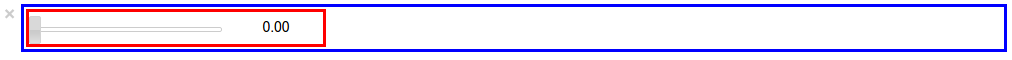

In [3]:
wid.target.layout.border = 'red solid'
wid.widget.layout.border = 'blue solid'
#wid.widget
Image(filename='shaolin_syntax_data/img_1.png')

<a id='widget_attributes'></a>

## 2.2 Widget attributes

As all the interactive logic will be using the target attribute a set of aliases and functions have been defined in order to simplify accessing the most common widget attributes. A widget has the following aliases:

- **value**: widget.target.value
- **options**: widget.target.options
- **orientation**: widget.target.orientation
- **visible**: Mimics the old ipywidgets interface. A True value will make a widget visible and a False value will hide it.

<a id='widget_creation'></a>

## 2.3 Widget creation

[Back to top](#index)

Although using shaoscript to create a widget is the recommended way of instantiating a widget this can also be done usgint the shaolin widget class directly as a wrapper for an ipywidget Widget. 

<a id='widget_creation_class'></a>

### 2.3.1 Using the Widget class

A shaolin widget can be instantiated using the Widget object from the shaolin.core module. All the attributes passed besides the widget type are meant to be passed to the target widget.

In [4]:
from shaolin.core.widgets import Widget
import ipywidgets as widgets

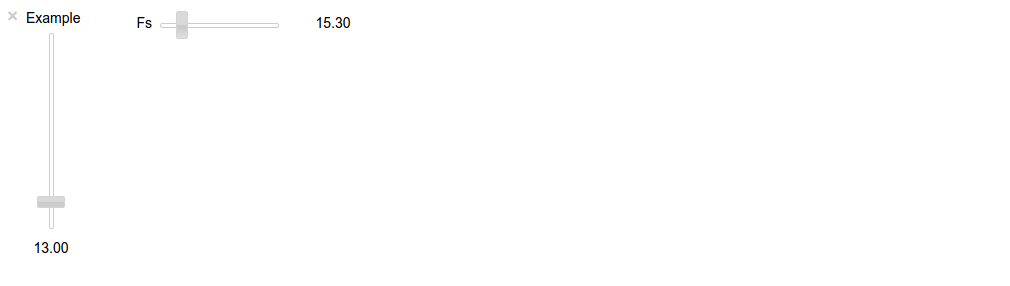

In [5]:
class_wid = Widget(widgets.FloatSlider, description='Fs', value=15.3)

target_kwargs = {'orientation':'vertical',
          'value':13.,
          'description':'Example'
         }
class_wid2 = Widget(widgets.FloatSlider,**target_kwargs)
#widgets.HBox(children = [class_wid2.widget,class_wid.widget])
Image(filename='shaolin_syntax_data/img_2.png')

<a id='widget_creation_shaoscript'></a>

### 2.3.2 Using shaoscript

The recommended way for creating a shaolin widget is using what is called shaoscript. Shaoscript is a minified syntax that allows for faster widget creation. This can be done the following way:

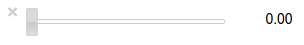

In [6]:
from shaolin.core.shaoscript import shaoscript

wid = shaoscript('fs') #this creates a FloatSlider widget
#wid.widget
Image(filename='shaolin_syntax_data/img_3.png')

<a id='shaoscript'></a>

# 3 Shaoscript

[Back to top](#index)

There are two ways of creating a Shaolin widget using shaoscript:

<a id='object_notation'></a>

## 3.1 Object notation

The object notation is an extension of the syntax used for the [interact function](http://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html) of the ipywidgets package that allows to define a numeric or boolean widget by passing a python object (a tuple or a list). this object is called an object notation word.

The syntax rules fro creating widgets using object notation are the following:

- ### Slider widgets

    - #### Data types
         Set by the element of the tuple containing the value parameter.
         Compatible types are:

         - **float** --> FloatSlider widget.
         - **int** --> IntSlider widget.
         - **tuple of int** --> IntRangeSlider widet.
         - **tuple of float** --> FloatRangeSlider widet.

    - #### Syntax
         - Extended object notation: **(min,max,step,value)**
         - Compact notation: **(value)**

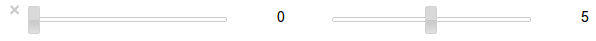

In [7]:
extended_islid = shaoscript(1)
compact_islid = shaoscript((0,10,1,5))
#widgets.HBox(children=[extended_islid.widget,compact_islid.widget])
Image(filename='shaolin_syntax_data/img_4.png')

- ### Numeric text box widgets

    - #### Data types
         Set by the element of the list containing the value parameter.
         Compatible types are:

         - **list of float** --> FloatText widget.
         - **list of int** --> IntText widget.

    - #### Syntax
         - Extended object notation: **[min,max,value]**:
         - Compact notation: **[value]**

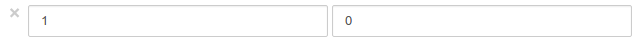

In [8]:
extended_ftxt = shaoscript([1.])
compact_ftxt = shaoscript([0.,10.,2.16])
#widgets.HBox(children=[extended_ftxt.widget,compact_ftxt.widget])
Image(filename='shaolin_syntax_data/img_5.png')

- ### Boolean widgets:
    - #### Data types:
         Value must be a bool.

         - **True,False** --> Checkbox widget.
         - **tuple** --> Checkbox widget.
         - **list** --> ToggleButton widet.
         - **[(bool,)]** --> Valid Widget

    - #### CheckBox
         - Extended object notation:
           - **(value,description)**, 
           - **(value)**
         - Compact notation: **value**

    - #### ToggleButton
         - Extended object notation:
           **[value, description]**
         - Compact notation: **[value]**

    - #### Valid
         - Compact notation:
           - **[[value]]**
           - **[(value,)]**

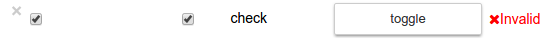

In [9]:
checkbox = shaoscript(True)
checkbx_2 = shaoscript((True,'check'))
togglebutton = shaoscript([False, 'toggle'])
valid = shaoscript([[False]])
#widgets.HBox(children=[checkbox.widget,checkbx_2.widget, togglebutton.widget,valid.widget])
Image(filename='shaolin_syntax_data/img_6.png')

- ### Options widgets:

    - #### Data types
         - **tuple** --> Dropdown widget.
         - **list** --> SelectMultiple widget.
         
    - #### Dropdown

        - Extended object notation:
          **(options,value)**
        - Compact notation: **(options)**

    - #### SelectMultiple

        - Extended object notation:
          **[options,value]**
        - Compact notation: **[options]**

    

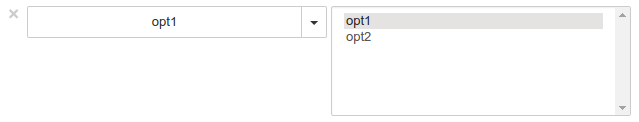

In [10]:
ddown = shaoscript((['opt1','opt2'],'opt1'))
selmul = shaoscript([('opt1','opt2'),('opt1',)])

#widgets.HBox(children=[ddown.widget,selmul.widget])
Image(filename='shaolin_syntax_data/img_7.png')

<a id='string_notation'></a>

## 3.2 String notation

[Back to top](#index)

Any Shaolin Widget can be created passing a string as a shaoscript parameter. This is the recommended way of instantiating widgets and the only way a Dashboard component can be stated. A widget can be created using its string keyword or a string which its literal evaluation is an object notation word.

Each type of widget has multiple valid aliases. The available words for defining each type of widget are:

- ### **Layout and Markdown**
    - **HBox** -->   ['r', 'row', 'HBox', 'R', 'Box', 'H']
    - **VBox** --> ['c', 'col', 'column', 'VBox', 'V']
    - **Title** --> ['title', 'h1', '#', 't']
    - **SubTitle** --> ['subtitle', 'h2', '##', 'sub', 's']
    - **SubSubTitle** --> ['subsubtitle', 'h3', '###', 'subsub', 'ss']
- ### Numeric widgets
    - **FloatSlider** --> ['float_slider', 'floatslider', 'fsld', 'fs']
    - **IntSlider** --> ['int_slider', 'intslider', 'isld', 'is']
    - **FloatText** --> ['float_text', 'floattext', 'ftxt', 'ft']
    - **IntText** -->  ['int_text', 'inttext', 'itxt', 'it']
    - **FloatRange** --> ['float_range', 'floatprogress', 'fprog', 'fp']
    - **IntRange** --> ['int_range', 'intrange', 'irng', 'ir']
    - **FloatProgress** --> ['float_progress', 'floatprogress', 'fprog', 'fp']
    - **IntProgress** --> ['int_progress', 'intprogress', 'iprog', 'ip']
- ### Boolean widgets:
    - **ToggleButton** --> ['toggle_button', 'toggle', 'tog']
    - **Other boolean widgets** --> Use an object notation compliant string.
- ### Selection widgets
    - **Select** --> ['select', 'sel']
    - **SelectMultiple** --> ['select_multiple', 'selmul', 'sm']
    - **SelectionSlider** --> ['selection_slider', 'selslider', 'ss']
    - **Dropdown** --> ['dropdown', 'dd', 'ddown'
    - **ToggleButtons** --> ['toggle_buttons', 'toggles', 'togs']
    - **RadioButtons** --> ['radio_buttons', 'radio', 'rad','rs']
- ### String widgets
    - **Text** --> ['text', 'txt','str','string']
    - **TextArea** --> ['TextArea', 'texta', 'textarea', 'text_area']
- ### Other widgets
    - **HTML** --> ['html', 'HTML']
    - **ColorPicker** --> ['color', 'colorpicker','cp','cpicker']
    - **Button** --> ['button', 'btn', 'b']
    - **Label** --> Any other value.

<a id='string_notation_parameters'></a>

### 3.3 String notation with parameters

It is also possible to set the parameters of the widgets using string notation. This way it's easier and shorter to instantiate a widget with non default params. 

The syntax for writing a string notation widget with custom parameters is the following:

<img src="syntax_color.png"></img>

This means that the widget name provided as a string representation of the object notation or its string notation will be separated from the parameters by a dollar sign $ and each of the parameters will be separated by an & sign.

In a general case the name of the parameter and its value will be separated by a = sign, and the value will be a literal evaluation of the string. 

<a id='parameters'></a>

## 3.4 Parameters

[Back to top](#index)

There are some of the most common parameters that have special shorcuts in order to save tiem when defining a widget. These are the parameters that behave in a non default way:

- **name**
    - alias: name, n, N
    - parsing: as string (No need to write string quotes)
- **description**
    - alias: description, d ,D
    - parsing: as string. Setting the description and not the name will set the name param as "description".lower().replace(" ","_")
- **visible**
    - alias: visible, vis, v
    - parsing: 0, False as False, else True
- **orientation**
    - alias: orientation, ori
    - parsing: as string. if val in ['v', 'vertical'] val='vertical' elif val in ['h','horizontal'] val='horizontal'
- **value**
    - alias: value, val
    - parsing: literal evaluation.
- **mode**
    - aias: mode, m
    - parsing: as string.


<a id='examples'></a>

# 4 Examples

[Back to top](#index)

Here are some examples of using a widget with shaoscript versus using the standard ipywidgets package for defining them.

<a id='examples_sliders'></a>

## 4.1 sliders with different sintaxes

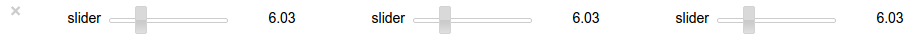

In [11]:
fs_wid = widgets.FloatSlider(description='slider',
                             min=3.14,
                             max=15,
                             step=0.16,
                             value=6.0290
                            )
fs_shao_objn = shaoscript('(3.14,15,0.16,6.0290)$d=slider')#object notation
fs_shao_strn = shaoscript('fs$d=slider&min=3.14&max=15&step=0.16&val=6.0290')#string notation
#widgets.HBox(children=[fs_wid,fs_shao_objn.widget,fs_shao_strn.widget])
Image(filename='shaolin_syntax_data/img_8.png')

<a id='examples_markdown'></a>

## 4.2 Markdown

It is possible to write a shorcut por creating different kinds of text widgets according to markdown syntax

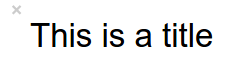

In [12]:
title = shaoscript('#This is a title')
#title.widget
Image(filename='shaolin_syntax_data/img_9.png')

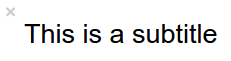

In [13]:
title = shaoscript('##This is a subtitle')
#title.widget
Image(filename='shaolin_syntax_data/img_10.png')

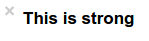

In [14]:
title = shaoscript('###This is strong')
#title.widget
Image(filename='shaolin_syntax_data/img_11.png')